# Principle Component Analysis (PCA)
- dimension reduction method
- application:
    - visualization
    - make the training of an algorithm faster
- steps:
    - standardize the origianl dataset
    - calculate the covariance matrix
    - calculate the eigenvalues with their eigenverctors
    - sort eigenvalues in descrnding order
    

# 1. Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
%matplotlib inline

# 2. Load data
**This dataset has 4 features (4 dimension) and 3 targets.**

In [2]:
iris = load_iris()
X = iris['data']
Y = iris['target']
df = pd.DataFrame(np.concatenate((X, Y.reshape((-1,1)) ), axis=1), columns=iris['feature_names'] + ['target'])

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# 3. Standardize  data
- **Centering and scaling**
- **Many ML assumes all features are centered around 0 => removing the mean** 
- **Many ML performs better when numerical input variables are scaled to a standard range => scaling to unit variance**
- **Happens independently on each feature**

In [4]:
def Standardize_data(X):
    return (X - np.mean(X, axis = 0))/np.std(X, axis = 0)

In [5]:
X_std = Standardize_data(X)
pd.DataFrame(X_std)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# 4. Calculate the covariance matrix

In [86]:
def COV(X,Y):
    n = len(X)
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    S = 0
    for i in range(n):
        S = S + (X[i] - X_mean)*(Y[i] - Y_mean)     
    return S/n

In [87]:
X.shape

(150, 4)

In [88]:
n_feature = X.shape[1]
cov_M = np.empty((n_feature,n_feature))

In [89]:
for i in range(n_feature):
    for j in range(n_feature):
        feature1 = X_std[:, i]
        feature2 = X_std[:, j]
        cov = COV(feature1, feature2)
        cov_M[i,j] = cov

In [90]:
cov_M

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

# 5. Calculate the eigenvectors and eigenvalues

In [91]:
from numpy.linalg import eig

In [92]:
eig_vals, eig_vecs = eig(cov_M) 

In [93]:
eig_vals

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [94]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

# 6. Sort eigenvectors based on their eigenvalues 

In [95]:
paired_eigenvalue_eigenvector = {}
for i in range(n_feature):
    paired_eigenvalue_eigenvector[eig_vals[i]] = eig_vecs[:, i]

In [96]:
paired_eigenvalue_eigenvector

{2.9184978165319957: array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]),
 0.9140304714680684: array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]),
 0.1467568755713149: array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]),
 0.020714836428619838: array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713])}

In [97]:
sorted_eigenvalue_eigenvector = dict(sorted(paired_eigenvalue_eigenvector.items(), reverse = True))

In [98]:
sorted_eigenvalue_eigenvector

{2.9184978165319957: array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]),
 0.9140304714680684: array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]),
 0.1467568755713149: array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]),
 0.020714836428619838: array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713])}

# 7. Choose $k$ principal components, and get the projection matrix

In [99]:
k = 2
projection_mat = np.array([sorted_eigenvalue_eigenvector[i] for i in list(sorted_eigenvalue_eigenvector)[:k]])

In [100]:
projection_mat

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199]])

# 8. Project the origianl data to the new coordinate (the projection matrix or the $k$-dimension feature subspace)

In [101]:
X_proj = X_std.dot(projection_mat.T)

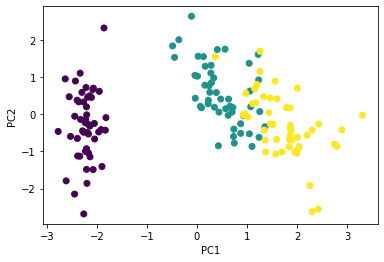

In [103]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = Y)
plt.xlabel('PC1');#plt.xticks([])
plt.ylabel('PC2');# plt.yticks([])
plt.show()

# 9. Compara with other options

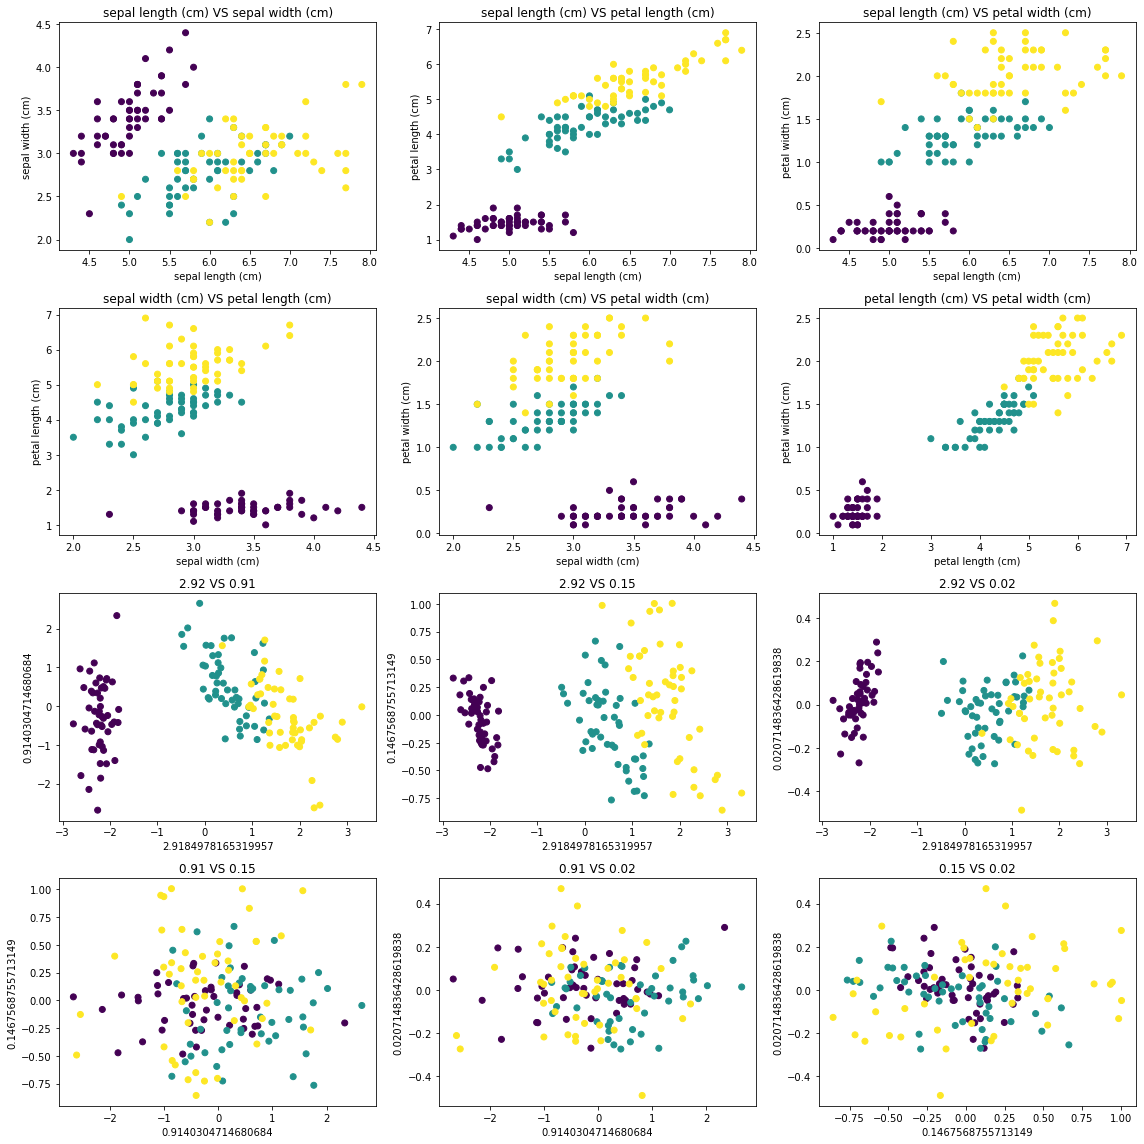

In [105]:
from itertools import combinations

pairs = list(combinations(list(range(4)), 2))

fig, ax = plt.subplots(nrows=4, ncols=3, figsize= (16, 16))
fig.tight_layout()

# features
names = iris.feature_names
idx1 = 0
for row in range(2):
    for col in range(3):
        i, j = pairs[idx1]
        ax[row, col].scatter(X[:, i], X[:, j], c = Y)
        ax[row, col].set_xlabel(names[i])
        ax[row, col].set_ylabel(names[j])
        ax[row, col].title.set_text('{} VS {}'.format(names[i], names[j]))
        fig.tight_layout()
        idx1 += 1
        
# projected components

idx2 = 0
for row in range(2,4):
    for col in range(3):
        i, j = pairs[idx2]
        keys = list(sorted_eigenvalue_eigenvector)
        k1, k2 = keys[i], keys[j]
        projection_mat = np.array([sorted_eigenvalue_eigenvector[i] for i in [k1, k2]])
        X_proj = X_std.dot(projection_mat.T)
        ax[row, col].scatter(X_proj[:, 0], X_proj[:, 1], c = Y)
        ax[row, col].set_xlabel(k1)
        ax[row, col].set_ylabel(k2)
        ax[row, col].title.set_text('{:.2f} VS {:.2f}'.format(k1, k2))
        fig.tight_layout()
        idx2 += 1

# 10. Implement the PCA via SKlearn

Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Transformed data shape: (150, 2)


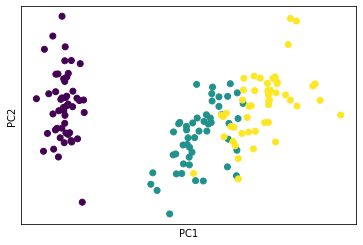

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components = 2).fit(X_std)

print('Components:\n', pca.components_)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = Y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.show()

# Reference:
1. https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
2. https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/